In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [322]:
def load_data(path, ring, label):
    y_values = np.loadtxt(f'{path}/{ring}/{label}.dat', usecols=1, skiprows=1)
    x_values = np.loadtxt(f'{path}/{ring}/{label}.dat', usecols=0, skiprows=1)
    return x_values, y_values

def vectorize_data(path_list, dihedral_list, ring_list):
    all_data = np.empty((len(ring_list), len(path_list), len(label_list)), dtype=object)
    for i, ring in enumerate(ring_list):
        for j, path in enumerate(path_list):
            for k, dihedral in enumerate(dihedral_list):
                all_data[i, j, k] = load_data(path, ring, dihedral)
    return all_data

def make_histogram(data):
    if data.size > 0:  
        counts, bin_edges = np.histogram(data, bins=200, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    return bin_centers, counts

def make_pmf(data):
    kt=0.5922
    if data.size > 0: 
        counts, bin_edges = np.histogram(data, bins=200, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2        
    return bin_centers, -kt*np.log(counts)

def make_plot(input_array, labels, colors, legends, plot_type):
    x, y, z = input_array.shape 
    fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=False, sharey=False)
    axes = axes.flatten()
    np.seterr(divide='ignore')
    bins = np.empty(len(input_array[0][0][0][0]), dtype=object)
    counts = np.empty(len(input_array[0][0][0][0]), dtype=object)
    pmfs = np.empty(len(input_array[0][0][0][0]), dtype=object)
    for i in range(z):
        ax = axes[i]
        for j in range(y):
            if plot_type == 'prob':
                bins[j], counts[j] = make_histogram(input_array[0][j][i][1])
                ax.scatter(bins[j], counts[j], color=colors[j], label=legends[j], s=20)
            elif plot_type == 'pmf':
                bins[j], pmfs[j] = make_pmf(input_array[0][j][i][1])
                ax.scatter(bins[j], pmfs[j], color=colors[j], label=legends[j], s=20)
            else:
                raise ValueError("plot_type must be either 'prob' or 'pmf'")
        if plot_type == 'prob':
            ax.set_ylim(0, 0.06)
            ax.set_yticks([0, 0.025, 0.05]) 
            ax.set_xlim(-180, 180)
            ax.set_xticks([-140, 0, 140]) 
            ax.set_xticklabels(['-140 (anti)', '0 (syn)', '140 (anti)']) 
            ax.set_xlabel(f'{labels[i]} (Degrees)', fontsize=20)
            ax.set_ylabel(f'P({labels[i]})', fontsize=20)
            ax.tick_params(labelsize=15)
            ax.legend(fontsize=12, loc='upper left', frameon=False)
        elif plot_type == 'pmf':
            ax.set_xlim(-180, 180)
            ax.set_xticks([-140, 0, 140]) 
            ax.set_xticklabels(['-140 (anti)', '0 (syn)', '140 (anti)']) 
            ax.set_ylim(1.5, 8)
            ax.set_xlabel(f'{labels[i]} (Degrees)', fontsize=20)
            ax.set_ylabel(f'PMF({labels[i]}) (kcal/mol)', fontsize=20)
            ax.tick_params(labelsize=15)
            ax.legend(fontsize=8, loc='upper center', frameon=False)     
        else:
            raise ValueError("plot_type must be either 'prob' or 'pmf'")
    plt.tight_layout()
    #plt.savefig('./dihedrals_noureen.png', format='png', dpi=300, bbox_inches='tight')
        
def plot_time_series(array):
    index_list=[0, 2, 4]
    window_size=10000
    for i in index_list:
        x, y = array[i]
        #smooth_y = gaussian_filter(y,sigma=1000)
        smooth_y = np.convolve(y, np.ones(window_size)/window_size, mode='valid')
        smooth_x = x[:len(smooth_y)]
        plt.scatter(smooth_x, smooth_y, s=1)
        plt.ylim(-40, 40)

In [332]:
bv_path_list = ['Biliverdin_FFs_and_Waters/tip3p_gaff2/1micro_dihs', 'Biliverdin_FFs_and_Waters/tip3p_sage/1micro_dihs',
             'Biliverdin_FFs_and_Waters/opc_gaff2/1micro_dihs', 'Biliverdin_FFs_and_Waters/opc_sage/1micro_dihs']

tps_path_list = [ 'Tetrapyrrolesystem_FFs_and_Waters/tip3p_gaff2/200ns_dihs', 'Tetrapyrrolesystem_FFs_and_Waters/tip3p_sage/200ns_dihs',
              'Tetrapyrrolesystem_FFs_and_Waters/opc_gaff2/200ns_dihs', 'Tetrapyrrolesystem_FFs_and_Waters/opc_sage/200ns_dihs']

dihedral_list = ['single5', 'double5', 'single10', 'double10', 'single15', 'double15']
ring_list = ['b-ring']

labels=[r'$φ_5$', r'$ψ_5$', r'$φ_{10}$', r'$ψ_{10}$', r'$φ_{15}$', r'$ψ_{15}$']
colors=['red', 'blue', 'green', 'black']
legends=['TIP3P(w)+gaff2(BV)' , 'TIP3P(w)+sage(BV)', 'OPC(w)+gaff2(BV)', 'OPC(w)+sage(BV)']

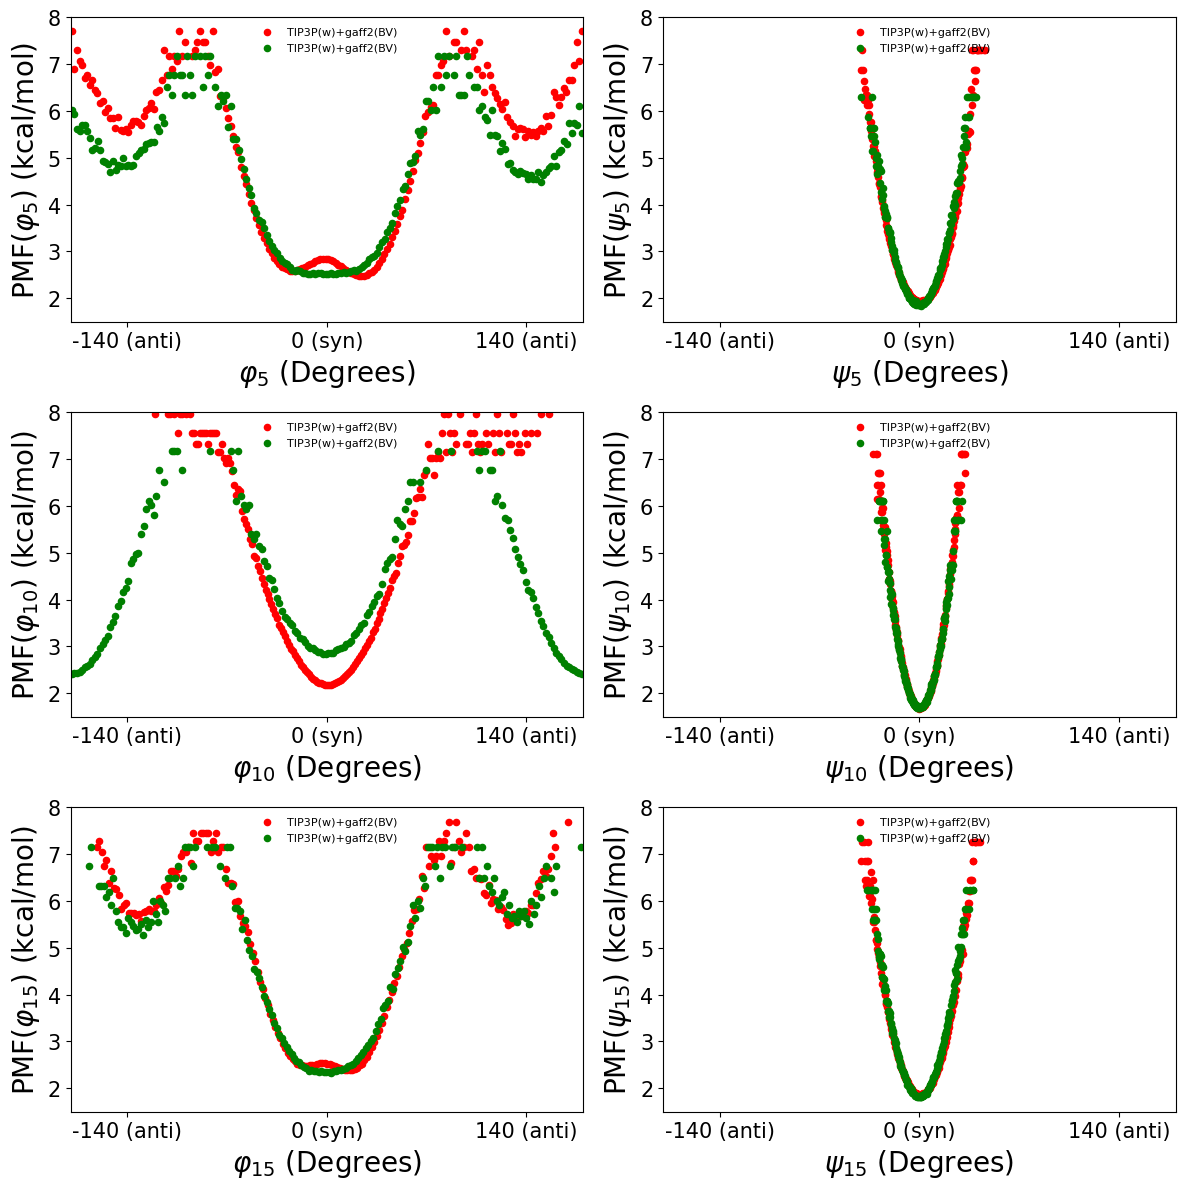

In [335]:
x=0
y=2
a = vectorize_data((bv_path_list[x], tps_path_list[x]), dihedral_list, ring_list)
make_plot(a, labels, (colors[x], colors[y]), (legends[x], legends[x]), 'pmf')